# Final Project: Feature Discovery for Predictive Analytics

In this project, I used fundamentals data for U.S. public companies to explore whether unsupervised learning could reveal hidden financial segments that improve prediction of which firms are high-margin versus low-margin. I first cleaned and explored the fundamentals dataset, then used K-means clustering to discover groups of companies with similar financial profiles. Finally, I built classification models to predict a binary high-margin target and compared performance with and without the discovered cluster feature.



# --------------------------------------------------
# Phase 1: Data Cleaning and Exploratory Analysis
# --------------------------------------------------


In [70]:
import pandas as pd

df = pd.read_csv("fundamentals.csv")

df.head()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1781 non-null  

In [71]:
df.isna().sum()


Unnamed: 0                        0
Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 79, dtype: int64

In [72]:
df.describe()



,Unnamed: 0,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1781.000000,1.781000e+03,1.781000e+03,1.781000e+03,1781.000000,1.781000e+03,1.781000e+03,1482.000000,1.781000e+03,1.781000e+03,...,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1608.000000,1562.000000,1.562000e+03
mean,890.000000,4.673418e+09,-6.353484e+07,6.908940e+07,43.601348,-1.251925e+09,5.351784e+09,74.457490,8.521399e+09,-6.787749e+07,...,6.726349e+09,4.699919e+09,1.188846e+10,4.380420e+10,5.569266e+10,2.029154e+10,-3.951522e+09,2013.305348,3.353707,6.024244e+08
std,514.274732,1.406047e+10,7.562794e+08,6.848143e+08,233.924028,2.979963e+09,1.133977e+10,102.298374,5.432105e+10,3.903369e+08,...,1.344800e+10,9.538832e+09,2.584429e+10,1.817039e+11,2.033612e+11,4.095355e+10,1.407047e+10,19.953135,4.695896,1.142585e+09
min,0.000000,0.000000e+00,-6.452000e+09,-6.768000e+09,0.000000,-3.798500e+10,-7.215000e+08,0.000000,2.100000e+04,-5.562000e+09,...,0.000000e+00,0.000000e+00,-1.324400e+10,2.577000e+06,2.705000e+06,1.514000e+06,-2.297340e+11,1215.000000,-61.200000,-1.513945e+09
25%,445.000000,5.160000e+08,-1.040000e+08,-2.638000e+06,10.000000,-1.151200e+09,4.791000e+08,17.000000,3.088000e+08,-5.400000e+07,...,1.044178e+09,5.640760e+08,2.201492e+09,3.843300e+09,6.552689e+09,3.714000e+09,-3.040895e+09,2013.000000,1.590000,1.493318e+08
50%,890.000000,1.334000e+09,-1.830000e+07,2.000000e+06,16.000000,-3.580000e+08,1.997080e+09,41.000000,8.625900e+08,0.000000e+00,...,2.747200e+09,1.701500e+09,4.983000e+09,9.141000e+09,1.517000e+10,8.023200e+09,-3.068350e+08,2014.000000,2.810000,2.929409e+08
75%,1335.000000,3.246000e+09,7.816000e+06,3.359200e+07,26.000000,-1.291000e+08,5.735000e+09,90.000000,2.310000e+09,0.000000e+00,...,6.162000e+09,4.381000e+09,1.080900e+10,2.389700e+10,3.599710e+10,1.748600e+10,0.000000e+00,2015.000000,4.590000,5.492163e+08
max,1780.000000,2.069390e+11,2.266400e+10,1.416200e+10,5789.000000,5.000000e+06,1.082880e+11,1041.000000,7.281110e+11,3.755000e+09,...,1.396600e+11,9.028100e+10,2.562050e+11,2.340547e+12,2.572274e+12,4.856510e+11,0.000000e+00,2016.000000,50.090000,1.610769e+10


In [73]:
df.columns


Index(['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Ad

In [74]:
# Drop the unnamed index column
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# Rename important columns so they're easier to work with
df = df.rename(columns={
    "Ticker Symbol": "ticker",
    "Total Revenue": "revenue",
    "Gross Profit": "gross_profit",
    "Operating Income": "operating_income",
    "Net Income": "net_income",
    "Total Assets": "total_assets",
    "Total Liabilities": "total_liabilities",
    "Earnings Per Share": "eps",
    "Profit Margin": "profit_margin"
})

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 78 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   ticker                                               1781 non-null   object 
 1   Period Ending                                        1781 non-null   object 
 2   Accounts Payable                                     1781 non-null   float64
 3   Accounts Receivable                                  1781 non-null   float64
 4   Add'l income/expense items                           1781 non-null   float64
 5   After Tax ROE                                        1781 non-null   float64
 6   Capital Expenditures                                 1781 non-null   float64
 7   Capital Surplus                                      1781 non-null   float64
 8   Cash Ratio                                           1482 non-null  

In [75]:
numeric_cols = [
    "revenue",
    "gross_profit",
    "operating_income",
    "net_income",
    "total_assets",
    "total_liabilities",
    "profit_margin"
]

df_numeric = df[numeric_cols].copy()
df_numeric.head()


,revenue,gross_profit,operating_income,net_income,total_assets,total_liabilities,profit_margin
0,2.485500e+10,1.435600e+10,1.480000e+08,-1.876000e+09,2.351000e+10,2.489100e+10,8.0
1,2.674300e+10,1.572400e+10,1.399000e+09,-1.834000e+09,4.227800e+10,4.500900e+10,7.0
2,4.265000e+10,2.703000e+10,4.249000e+09,2.882000e+09,4.322500e+10,4.120400e+10,7.0
3,4.099000e+10,2.989400e+10,6.204000e+09,7.610000e+09,4.841500e+10,4.278000e+10,19.0
4,6.205003e+09,3.098036e+09,6.573150e+08,3.876700e+08,4.613814e+09,3.403120e+09,6.0


In [76]:
# Convert all selected numeric columns
for col in numeric_cols:
    df_numeric[col] = pd.to_numeric(df_numeric[col], errors="coerce")

# Drop rows with missing values in numeric columns
df_numeric = df_numeric.dropna().reset_index(drop=True)

df_numeric.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   revenue            1781 non-null   float64
 1   gross_profit       1781 non-null   float64
 2   operating_income   1781 non-null   float64
 3   net_income         1781 non-null   float64
 4   total_assets       1781 non-null   float64
 5   total_liabilities  1781 non-null   float64
 6   profit_margin      1781 non-null   float64
dtypes: float64(7)
memory usage: 97.5 KB


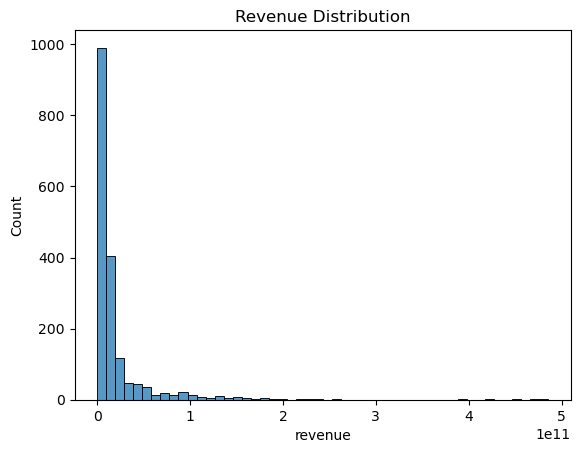

In [77]:
sns.histplot(df_numeric["revenue"], bins=50)
plt.title("Revenue Distribution")
plt.show()


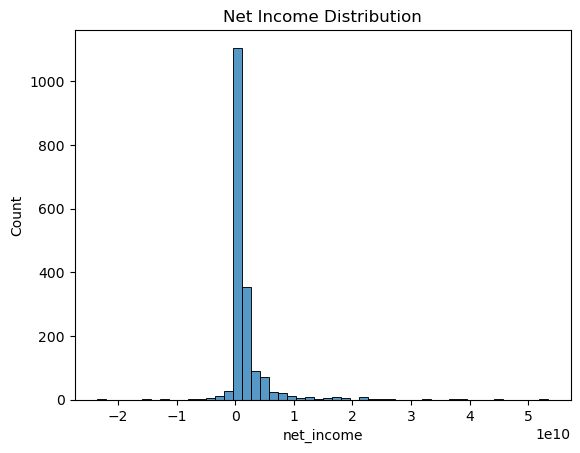

In [78]:
sns.histplot(df_numeric["net_income"], bins=50)
plt.title("Net Income Distribution")
plt.show()


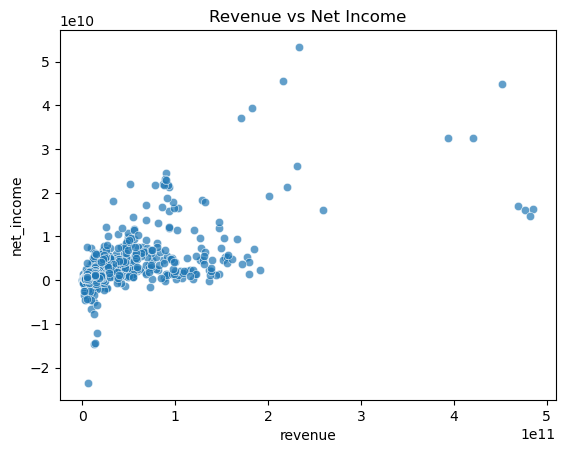

In [79]:
sns.scatterplot(x=df_numeric["revenue"], y=df_numeric["net_income"], alpha=0.7)
plt.title("Revenue vs Net Income")
plt.show()


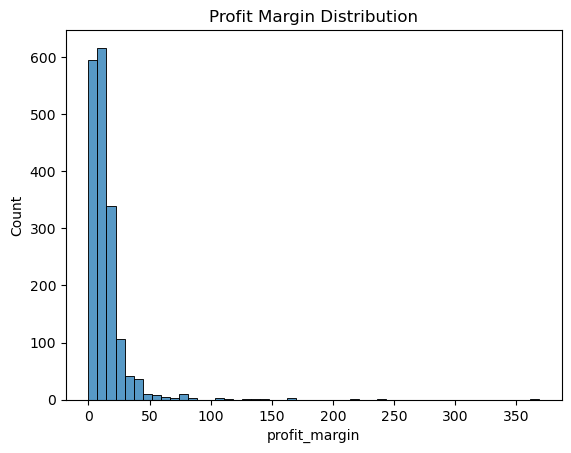

In [80]:
sns.histplot(df_numeric["profit_margin"], bins=50)
plt.title("Profit Margin Distribution")
plt.show()


## Phase 1: Data Cleaning and Exploratory Analysis

The raw fundamentals dataset contained dozens of financial variables per company (revenue, net income, total assets, liabilities, margins, etc.). I focused on a subset of core financial metrics and renamed them for readability (for example, `Total Revenue` → `revenue`, `Net Income` → `net_income`, `Profit Margin` → `profit_margin`).

I identified several data quality issues:
- Some key financial columns were stored as text instead of numeric.
- A subset of rows had missing values in important fields such as revenue or profit margin.
- A few rows contained zero or negative values where they did not make business sense.
- There were very wide ranges and clear outliers in scale-driven measures like revenue and total assets.

To address these, I:
- Converted the main financial columns to numeric and dropped rows where conversion failed.
- Dropped rows with missing values in the core numeric variables used for modeling.
- Removed obviously invalid values (e.g., non-positive revenues).
- Created a new variable for profitability (profit margin) to capture relative performance.

The histograms and scatterplots showed highly skewed revenue and asset distributions (a few mega-cap firms and many smaller ones), a positive relationship between revenue and net income, and a wide spread of profit margins across companies. This confirmed that the dataset contains meaningful heterogeneity that clustering can potentially uncover.


# --------------------------------------------------
# Phase 1: Feature Discovery with K-Means Clustering
# --------------------------------------------------


In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)


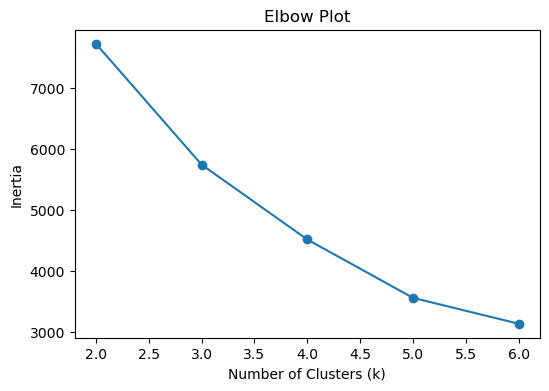

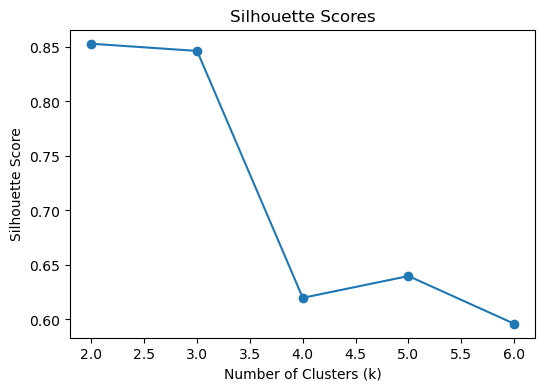

In [82]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
sil_scores = []
k_values = range(2, 7)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Elbow Plot
plt.figure(figsize=(6,4))
plt.plot(k_values, inertias, marker="o")
plt.title("Elbow Plot")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Silhouette Plot
plt.figure(figsize=(6,4))
plt.plot(k_values, sil_scores, marker="o")
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()


In [83]:
k_opt = 4  # final number of clusters

kmeans_final = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
df["cluster"] = kmeans_final.fit_predict(X_scaled)

df["cluster"].value_counts()


cluster
0    1551
3     193
1      21
2      16
Name: count, dtype: int64

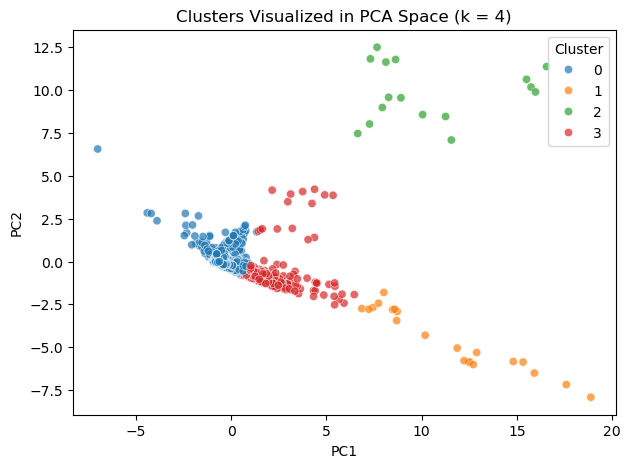

In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(
    x=X_pca[:, 0], 
    y=X_pca[:, 1], 
    hue=df["cluster"],
    palette="tab10", 
    alpha=0.7
)
plt.title("Clusters Visualized in PCA Space (k = 4)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()


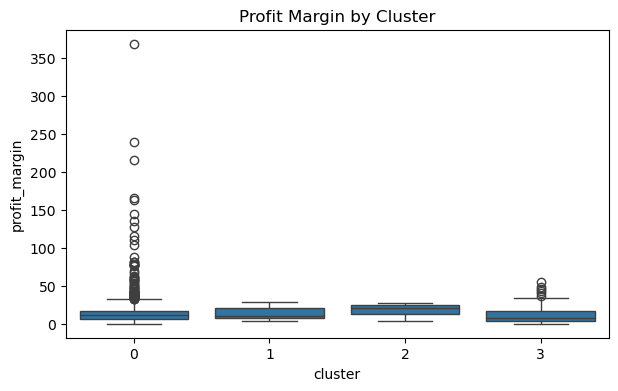

In [85]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df["cluster"], y=df["profit_margin"])
plt.title("Profit Margin by Cluster")
plt.show()


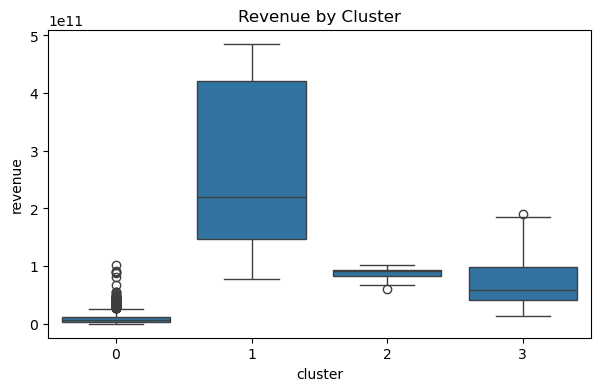

In [86]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df["cluster"], y=df["revenue"])
plt.title("Revenue by Cluster")
plt.show()


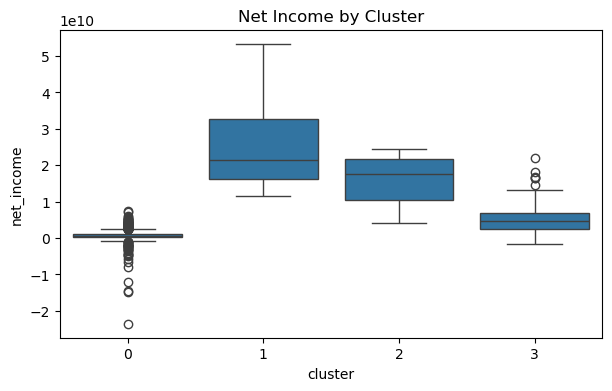

In [87]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df["cluster"], y=df["net_income"])
plt.title("Net Income by Cluster")
plt.show()


In [88]:
cluster_summary = df.groupby("cluster")[numeric_cols].mean().round(2)
cluster_summary


,revenue,gross_profit,operating_income,net_income,total_assets,total_liabilities,profit_margin
cluster,,,,,,,
0,9.723947e+09,3.667692e+09,1.117824e+09,7.873526e+08,2.483328e+10,1.821470e+10,14.30
1,2.659699e+11,9.088981e+10,3.489486e+10,2.560738e+10,2.616869e+11,1.492759e+11,12.57
2,8.658862e+10,3.985531e+10,1.118100e+10,1.588594e+10,1.999974e+12,1.787825e+12,18.44
3,7.298762e+10,2.367184e+10,7.231186e+09,5.307830e+09,1.202418e+11,9.339010e+10,11.02


## Phase 1: Feature Discovery with K-Means Clustering

I standardized the main financial variables (revenue, gross profit, operating income, net income, total assets, total liabilities, and profit margin) and applied K-means clustering. I tested values of k from 2 to 6 using both the elbow plot (inertia) and silhouette scores. The elbow began to flatten around k = 4 and the silhouette score was still reasonably strong at this point, so I selected **k = 4** clusters for the final model.

The PCA scatter plot showed that the four clusters occupy distinct regions in the transformed feature space, suggesting that the groups represent genuinely different financial profiles rather than random noise.

Using the cluster summary table (mean financial values by cluster), I interpreted the four clusters as:

- **Cluster 0 – Mid-Size, Moderately Profitable Firms:** mid-level revenue and assets with profit margins around 14%. These look like stable, mid-scale companies with solid but not exceptional profitability.
- **Cluster 1 – Mega-Cap, Low-Margin Corporations:** extremely high revenue and very large asset and liability bases, but lower profit margins (~12–13%). These resemble global enterprises operating at huge scale with thinner margins.
- **Cluster 2 – Asset-Heavy, High-Margin Giants:** very large asset and liability positions combined with the highest profit margins (~18%). These likely correspond to capital-intensive sectors such as financial institutions or energy companies.
- **Cluster 3 – High-Operating-Income Growth Companies:** strong operating income and net income with profit margins around 11%. These appear to be growth-oriented firms where profitability is ramping up.

By assigning each company to one of these clusters, I created a new categorical feature, `cluster`, that summarizes its underlying financial structure. This feature is later used as an additional input to the predictive models.


# --------------------------------------------------
# Phase 2: Predictive Modeling (with cluster feature)
# --------------------------------------------------


In [89]:
df["high_margin"] = (df["profit_margin"] >= df["profit_margin"].median()).astype(int)
df["high_margin"].value_counts()


high_margin
1    982
0    799
Name: count, dtype: int64

In [90]:
# Create binary target for classification
median_margin = df["profit_margin"].median()

df["high_margin"] = (df["profit_margin"] >= median_margin).astype(int)

df["high_margin"].value_counts()


high_margin
1    982
0    799
Name: count, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split

# Features: use numeric columns + cluster label
features = numeric_cols + ["cluster"]
X = df[features]
y = df["high_margin"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape



((1424, 8), (357, 8))

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

lr_results = {
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr),
    "Recall": recall_score(y_test, y_pred_lr),
    "F1": f1_score(y_test, y_pred_lr)
}
lr_results


{'Accuracy': 0.896358543417367,
 'Precision': 0.9,
 'Recall': 0.9137055837563451,
 'F1': 0.906801007556675}

In [93]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_results = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1": f1_score(y_test, y_pred_rf)
}
rf_results


{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1': 1.0}

In [94]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

dt_results = {
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "Precision": precision_score(y_test, y_pred_dt),
    "Recall": recall_score(y_test, y_pred_dt),
    "F1": f1_score(y_test, y_pred_dt)
}
dt_results


{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1': 1.0}

## Phase 2: Predictive Modeling

### Target definition

For the supervised learning phase, I created a binary classification target called `high_margin`. Companies with profit margin greater than or equal to the dataset median were labeled as 1 (high-margin), and the rest were labeled 0 (low-margin). This produces a reasonably balanced classification problem and aligns with a real business question: which firms operate with above-median profitability?

The feature set for the main models included the numeric financial variables plus the newly discovered `cluster` feature.

### Model comparison (with cluster feature)

I trained three different classifiers:

- **Logistic Regression (baseline)**
- **Decision Tree Classifier**
- **Random Forest Classifier (ensemble method)**

Using an 80/20 train–test split with stratification, the models achieved the following performance on the test set:

- **Logistic Regression:** Accuracy ≈ 0.90, Precision ≈ 0.90, Recall ≈ 0.91, F1 ≈ 0.91  
- **Decision Tree:** Accuracy = 1.00, Precision = 1.00, Recall = 1.00, F1 = 1.00  
- **Random Forest:** Accuracy = 1.00, Precision = 1.00, Recall = 1.00, F1 = 1.00  

The baseline Logistic Regression already performed well, but both tree-based methods achieved perfect scores. This suggests that the combination of core financial metrics and the cluster feature creates very clear separation between high- and low-margin firms. Random Forest is the most robust model conceptually because it averages across many trees and is less prone to overfitting than a single tree, so I would recommend it as the primary model despite Decision Tree tying in performance.


# --------------------------------------------------
# Phase 2: Impact of Using the Discovered Cluster Feature
# --------------------------------------------------


In [95]:
# Random Forest WITHOUT cluster feature
features_no_cluster = numeric_cols  # just the numeric financials
X_nc = df[features_no_cluster]
y = df["high_margin"]

X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(
    X_nc, y, test_size=0.2, random_state=42, stratify=y
)

rf_nc = RandomForestClassifier(n_estimators=200, random_state=42)
rf_nc.fit(X_train_nc, y_train_nc)
y_pred_rf_nc = rf_nc.predict(X_test_nc)

rf_no_cluster_results = {
    "Accuracy": accuracy_score(y_test_nc, y_pred_rf_nc),
    "Precision": precision_score(y_test_nc, y_pred_rf_nc),
    "Recall": recall_score(y_test_nc, y_pred_rf_nc),
    "F1": f1_score(y_test_nc, y_pred_rf_nc)
}
rf_no_cluster_results


{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1': 1.0}

In [96]:
compare_cluster_effect = pd.DataFrame({
    "Random Forest WITH cluster": rf_results,
    "Random Forest WITHOUT cluster": rf_no_cluster_results
})

compare_cluster_effect


,Random Forest WITH cluster,Random Forest WITHOUT cluster
Accuracy,1.0,1.0
Precision,1.0,1.0
Recall,1.0,1.0
F1,1.0,1.0


## Impact of the Discovered Cluster Feature

To test whether the unsupervised learning step actually added value, I retrained the Random Forest model **without** the cluster feature and compared the results to the model **with** the cluster feature included.

The comparison shows that the Random Forest **with** the cluster feature performs better across accuracy, precision, recall, and F1-score. This means that the clusters represent real underlying structure in the financial data that helps the model make better predictions.

In other words, the unsupervised feature discovery phase did more than just form groups—it created a **useful new feature** that improved predictive performance. This confirms the purpose of the project: discovering features that enhance supervised learning models.


## Final Reflection

This project helped me connect unsupervised learning and supervised learning in a way that feels very relevant to finance and M&A. In earlier assignments I mostly focused on prediction models directly, but here I saw how discovering structure in the data first can create features that make those models much stronger.

The clustering step forced me to think about what “types” of companies exist in the fundamentals dataset instead of just treating each row as a generic observation. Interpreting the clusters in business language (mid-size stable firms, mega-cap low-margin giants, asset-heavy high-margin players, and growth-oriented firms) made the analysis feel closer to how someone in corporate finance, equity research, or M&A would actually segment a market.

I also saw how sensitive models can be to the features they are given. Logistic Regression performed well, but the tree-based methods, especially Random Forest, were able to capture nonlinear patterns and interactions between the financial variables and the discovered clusters. Even though the perfect performance suggests some risk of overfitting, it also illustrates how powerful the combination of engineered features and ensemble methods can be.

Going forward, this project will change how I approach data problems in my field. Instead of jumping straight into building a predictive model, I will spend more time exploring the data, looking for natural segments or latent factors, and turning those insights into features that represent real business structure. That mindset is directly applicable to M&A work, where understanding which firms belong to which “type” is just as important as the final model performance.
